In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [16]:
import networkx as nx
import pandas as pd
import logging
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from collections import Counter

In [130]:
plt.rcParams['figure.figsize'] = (14, 8)

In [6]:
sys.path.append('./..')

In [7]:
logging.basicConfig(level=logging.ERROR, format="%(message)s")

In [8]:
from VRG.runner import get_grammars
from VRG.src.utils import load_pickle, dump_pickle

In [118]:
def get_rule_df(dataset, vrg):
    cols = 'id', 'size', 'freq', 'n', 'm', 'graph', 'is_connected'
    rows = []
    for rule in vrg.rule_list:
        row = {'dataset': dataset, 'id': rule.id, 'size': rule.lhs_nt.size, 'freq': rule.frequency, 'n': rule.graph.order(), 'm': rule.graph.size(), 
               'is_connected': nx.is_connected(rule.graph), 'graph': rule.graph}
        rows.append(row)
    return pd.DataFrame(rows)

In [120]:
datasets = 'grenoble', 'waterloo', 'uppsala'
dfs = []

for dataset in datasets:
    vrg = load_pickle(f'../VRG/dumps/grammars/{dataset}/VRG_leiden_6_0.pkl')
    print(vrg)
    df = get_rule_df(dataset=dataset, vrg=vrg)
    dfs.append(df)

rule_df = pd.concat(dfs, ignore_index=True)

graph: 'grenoble', mu: 6, type: 'mu_random' clustering: 'leiden' rules: 533(564) mdl: 3.98362e+08 bits
graph: 'waterloo', mu: 6, type: 'mu_random' clustering: 'leiden' rules: 643(670) mdl: 6.59593e+08 bits
graph: 'uppsala', mu: 6, type: 'mu_random' clustering: 'leiden' rules: 350(352) mdl: 2.88846e+09 bits


In [121]:
rule_df

,dataset,id,size,freq,n,m,is_connected,graph
0,grenoble,1,16,1,6,1,False,"(14561, 14562, 14563, 2737, 7961, 13435)"
1,grenoble,2,19,1,6,1,False,"(8658, 17560, 16252, 16253, 16254, 16255)"
2,grenoble,3,8,1,6,1,False,"(16963, 16964, 17795, 15467, 3373, 15262)"
3,grenoble,4,24,1,6,1,False,"(16646, 10345, 12009, 14866, 14867, 12799)"
4,grenoble,5,30,1,6,2,False,"(3722, 9963, 9964, 9965, 9967, 6815)"
...,...,...,...,...,...,...,...,...
1521,uppsala,348,49,1,2,1,True,"(22993, 22994)"
1522,uppsala,349,7,1,2,1,True,"(22649, 22650)"
1523,uppsala,350,13,1,2,1,True,"(28008, 28007)"
1524,uppsala,351,2,1,2,1,True,"(38678, 38679)"


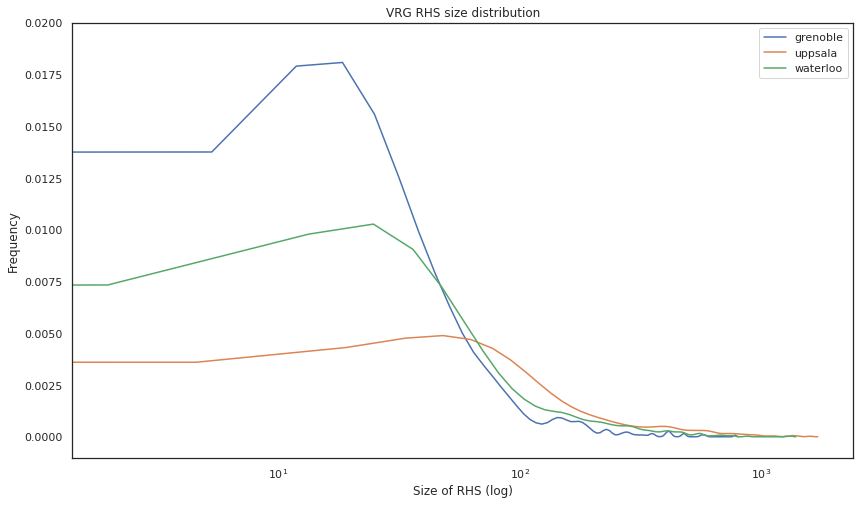

In [140]:
ax = plt.gca()
for name, group_df in rule_df.groupby('dataset'):
    sns.distplot(a=group_df['size'], hist=False, label=name)
# rule_df['size'].plot(kind='hist', bins=100);
ax.set_ylim((-0.001, 0.02))
ax.set_xscale('log')

plt.legend(loc='best')
plt.title('VRG RHS size distribution')
plt.ylabel('Frequency');
plt.xlabel('Size of RHS (log)');

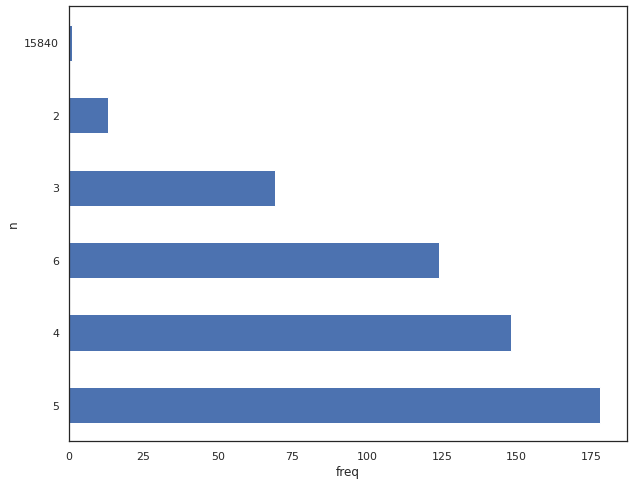

In [80]:
rule_df.n.value_counts().plot(kind='barh');
plt.ylabel('n');
plt.xlabel('freq');

In [122]:
rule_df['size'].value_counts()#.plot(kind='hist');
# plt.ylabel('n');
# plt.xlabel('size');

12     20
10     16
18     16
11     16
5      15
       ..
143     1
145     1
146     1
147     1
0       1
Name: size, Length: 145, dtype: int64

In [122]:
rule_df['size'].value_counts()#.plot(kind='hist');
# plt.ylabel('n');
# plt.xlabel('size');

12     20
10     16
18     16
11     16
5      15
       ..
143     1
145     1
146     1
147     1
0       1
Name: size, Length: 145, dtype: int64

In [95]:
rule_df.m.value_counts()#.plot(kind='hist');

1        442
2         61
3         19
4          7
6          2
94955      1
5          1
Name: m, dtype: int64

In [96]:
rule = vrg.rule_list[-2]
rule.draw()

In [17]:
rule = vrg.unique_rule_list[-3]
Counter(map(lambda d: d['gender'], nx.get_node_attributes(rule.graph, name='attr_dict').values()))

Counter({'male': 1, 'female': 1})

In [118]:
def get_gender_counts(row):
    graph = row.graph
    ctr = Counter(map(lambda d: d['gender'], nx.get_node_attributes(rule.graph, name='attr_dict').values()))
    

In [35]:
rule_df.graph.apply(lambda g: list(nx.get_node_attributes(g, name='attr_dict').values())[0]).head(1).values

array([{'gender': 'male', 'deviceType': 'Android', 'age_bucket': '35-plus', 'orig_label': 'gi:00-HnnJNMaTLpZFTgGzQEdJAA=='}],
      dtype=object)

In [41]:
rule_df['male_count'] = rule_df['graph'].apply(lambda g: Counter(map(lambda d: d['gender'], 
                                                                     list(nx.get_node_attributes(g, name='attr_dict').values()))))

KeyError: 'gender'

In [60]:
rule_df.head(1)['graph'].apply(lambda g: )

0    2
Name: graph, dtype: int64

In [104]:
def extract_gender(g, gender):
    attr_dict = nx.get_node_attributes(g, 'attr_dict')
    if len(attr_dict) == 0:
        return 0
    else:
        print(attr_dict.values())
        if 'gender' in attr_dict.values():
            ctr = Counter(map(lambda d: d['gender'], attr_dict.values()))
            if gender in ctr:
                return ctr[gender]
            else:
                return 0
        else:
            return 0

In [84]:
rule_df['male_count'] = -1
rule_df['female_count'] = -1

In [105]:
for i, row in enumerate(rule_df.itertuples()):
    rule_df.at[i, 'male_count'] = extract_gender(row.graph, 'male')
    rule_df.at[i, 'female_count'] = extract_gender(row.graph, 'female')

dict_values([{'gender': 'male', 'deviceType': 'Android', 'age_bucket': '35-plus', 'orig_label': 'gi:00-HnnJNMaTLpZFTgGzQEdJAA=='}, {'gender': 'female', 'deviceType': 'Android', 'age_bucket': '21-24', 'orig_label': 'gi:00-g9kwpeUwhfpTBHdt8A7jWA=='}, {'gender': 'female', 'deviceType': 'Ios', 'age_bucket': '25-34', 'orig_label': 'gi:00-dCf/XPH+qaBfl4MiJVtWhQ=='}, {'gender': 'female', 'deviceType': 'Ios', 'age_bucket': '21-24', 'orig_label': 'gi:00-RXmpwwzlkeP1CEx6Kkf6Pg=='}, {'gender': 'female', 'deviceType': 'Ios', 'age_bucket': '35-plus', 'orig_label': 'gi:00-2qVUxkvDHJjSm4USEgEVew=='}, {'gender': 'male', 'deviceType': 'Android', 'age_bucket': '35-plus', 'orig_label': 'gi:00-f2vpFI/XSKVvOvjkgMTnSw=='}])
dict_values([{'gender': 'male', 'deviceType': 'Android', 'age_bucket': '35-plus', 'orig_label': 'gi:00-HnnJNMaTLpZFTgGzQEdJAA=='}, {'gender': 'female', 'deviceType': 'Android', 'age_bucket': '21-24', 'orig_label': 'gi:00-g9kwpeUwhfpTBHdt8A7jWA=='}, {'gender': 'female', 'deviceType': 'Ios

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [103]:
rule_df.head(6)

,id,size,freq,n,m,is_connected,graph,male_count,female_count
0,1,16,1,6,1,False,"(14561, 14562, 14563, 2737, 7961, 13435)",0,0
1,2,19,1,6,1,False,"(8658, 17560, 16252, 16253, 16254, 16255)",0,0
2,3,8,1,6,1,False,"(16963, 16964, 17795, 15467, 3373, 15262)",0,0
3,4,24,1,6,1,False,"(16646, 10345, 12009, 14866, 14867, 12799)",0,0
4,5,30,1,6,2,False,"(3722, 9963, 9964, 9965, 9967, 6815)",0,0
5,6,63,1,6,1,False,"(15590, 13772, 13773, 4110, 13775, 13774)",0,0


In [101]:
extract_gender(rule.graph, 'male')

0